### Imports

In [2]:
#Imports
import numpy as np # linear algebra
import pandas as pd # 데이터 전처리
import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
import plotly.graph_objects as go
import plotly.express as px

#Seaborn theme
sns.set_theme(style="darkgrid")

### 데이터 로드

In [3]:
#Read csv
df = pd.read_csv("faang_stocks_pandemic_data.csv", index_col=0)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook


### 데이터 전처리
1. 결측치 제거
2. Date 컬럼을 Date 타입으로 변환
3. 연도, 월 컬럼 생성 및 숫자로 변환
4. 회사별로 분리(캔들 차트용)
5. 2021년도만 추출(꺾은선 그래프용)

In [4]:
# 결측치 제거
df.dropna(axis=0)

,Date,High,Low,Open,Close,Volume,Adj Close,Name
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook
...,...,...,...,...,...,...,...,...
1246,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google
1247,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google
1248,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google
1249,2022-03-31,2842.159912,2780.489990,2841.060059,2781.350098,1876200.0,2781.350098,Google


In [5]:
# Date 칼럼을 Date 데이터 타입으로 변환
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# 연도 및 월을 추출해서 새로운 컬럼 생성
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name,Year,Month
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook,2020,01
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook,2020,01
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook,2020,01
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook,2020,01
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook,2020,01


In [7]:
# Year 컬럼과 Month 컬럼 데이터 타입을 정수로 변경
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])

# 2021년도 행만 추출
df_2021 = df[df['Year'] == 2021]
df_2021 = df_2021.drop("Year", axis=1) # 2021년도만 뽑았으면 Year 컬럼을 제거

# 회사별로 2021년도만 추출(꺾은선에서 개별로 그리기 위함)
df_2021_Facebook = df_2021[df_2021['Name'] == 'Facebook']
df_2021_Amazon = df_2021[df_2021['Name'] == 'Amazon']
df_2021_Apple = df_2021[df_2021['Name'] == 'Apple']
df_2021_Netflix = df_2021[df_2021['Name'] == 'Netflix']
df_2021_Google = df_2021[df_2021['Name'] == 'Google']

In [8]:
# 회사별 변수에서 Month로 그룹핑하여 월 평균 주식가격으로 변환
df_by_month_2021_Facebook = df_2021_Facebook.groupby("Month").mean().reset_index()
df_by_month_2021_Amazon = df_2021_Amazon.groupby("Month").mean().reset_index()
df_by_month_2021_Apple = df_2021_Apple.groupby("Month").mean().reset_index()
df_by_month_2021_Netflix = df_2021_Netflix.groupby("Month").mean().reset_index()
df_by_month_2021_Google = df_2021_Google.groupby("Month").mean().reset_index()

# 종합 시각화용으로 쓸 Month 그룹핑 2021년 회사별 데이터 만들기
df_by_month_2021_Facebook.head()

,Month,High,Low,Open,Close,Volume,Adj Close
0,1,269.927371,261.123685,266.191054,264.609474,2.382279e+07,264.609474
1,2,269.660527,262.852104,265.948419,266.337894,1.672501e+07,266.337894
2,3,280.150867,271.381304,274.699129,275.506957,2.162681e+07,275.506957
3,4,310.812859,304.705712,307.908094,307.753810,2.005989e+07,307.753810
4,5,320.234996,313.684996,316.598499,317.335997,1.767118e+07,317.335997


In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_by_month_2021_Facebook['Month'], y=df_by_month_2021_Facebook['High'], mode='lines', name="Facebook"))
fig.add_trace(go.Scatter(x=df_by_month_2021_Apple['Month'], y=df_by_month_2021_Apple['High'], mode='lines', name="Apple"))
fig.add_trace(go.Scatter(x=df_by_month_2021_Amazon['Month'], y=df_by_month_2021_Amazon['High'], mode='lines', name="Amazon"))
fig.add_trace(go.Scatter(x=df_by_month_2021_Netflix['Month'], y=df_by_month_2021_Netflix['High'], mode='lines', name="Netflix"))
fig.add_trace(go.Scatter(x=df_by_month_2021_Google['Month'], y=df_by_month_2021_Google['High'], mode='lines', name="Google"))
fig.show()

#### Plotly 시각화
꺾은선 그래프

In [10]:
# 2021년도만 뽑은 df_2021 데이터를 사용하여 회사별로 시각화
fig = go.Figure() # Figure 추가

fig = px.line(df_2021, x="Month", y="High", 
             title='High Price of Stock',
             color='Name',
             line_group='Name',
             hover_name='Name')

fig.show()

### Candle 차트

1. ch.update_layout(xaxis_rangeslider_visible=False) 로 하단에 자동 생성되는 slider 옵션 제거 가능  
2. increasing_line_color, decreasing_line_color로 상승/하락봉의 스타일링 지정  
3. 캔들차트 생성을 위해서 Candlestick 함수를 호출  
4. 인덱스 및 open, high, low, close 인자를 설정  

#### 데이터 전처리
회사 별로 데이터 분리

In [13]:
df_facebook = df[df['Name'] == 'Facebook']
df_amazon = df[df['Name'] == 'Amazon']
df_google = df[df['Name'] == 'Google']
df_netflix = df[df['Name'] == 'Netflix']
df_apple = df[df['Name'] == 'Apple']

df_facebook.head()


,Date,High,Low,Open,Close,Volume,Adj Close,Name,Year,Month
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook,2020,1
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook,2020,1
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook,2020,1
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook,2020,1
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook,2020,1


#### Facebook 캔들 차트

In [22]:
candle = go.Candlestick(
	x=df_facebook.Date,
	open=df_facebook['Open'],
	high=df_facebook['High'],
	low=df_facebook['Low'],
	close=df_facebook['Close'],
	increasing_line_color='red', # 상승봉
	decreasing_line_color='blue' # 하락봉
)
ch = go.Figure(data=candle)
ch.show()

#### Apple 캔들 차트

In [23]:
candle = go.Candlestick(
	x=df_apple.Date,
	open=df_apple['Open'],
	high=df_apple['High'],
	low=df_apple['Low'],
	close=df_apple['Close'],
	increasing_line_color='red', # 상승봉
	decreasing_line_color='blue' # 하락봉
)
ch = go.Figure(data=candle)
ch.show()

#### Google 캔들 차트

In [24]:
candle = go.Candlestick(
	x=df_google.Date,
	open=df_google['Open'],
	high=df_google['High'],
	low=df_google['Low'],
	close=df_google['Close'],
	increasing_line_color='red', # 상승봉
	decreasing_line_color='blue' # 하락봉
)
ch = go.Figure(data=candle)
ch.show()

#### Netflix 캔들 차트

In [25]:
candle = go.Candlestick(
	x=df_netflix.Date,
	open=df_netflix['Open'],
	high=df_netflix['High'],
	low=df_netflix['Low'],
	close=df_netflix['Close'],
	increasing_line_color='red', # 상승봉
	decreasing_line_color='blue' # 하락봉
)
ch = go.Figure(data=candle)
ch.show()

#### Amazon 캔들 차트

In [26]:
candle = go.Candlestick(
	x=df_amazon.Date,
	open=df_amazon['Open'],
	high=df_amazon['High'],
	low=df_amazon['Low'],
	close=df_amazon['Close'],
	increasing_line_color='red', # 상승봉
	decreasing_line_color='blue' # 하락봉
)
ch = go.Figure(data=candle)
ch.show()

### 시계열 분석 ARIMA

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

import os
import warnings        
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.

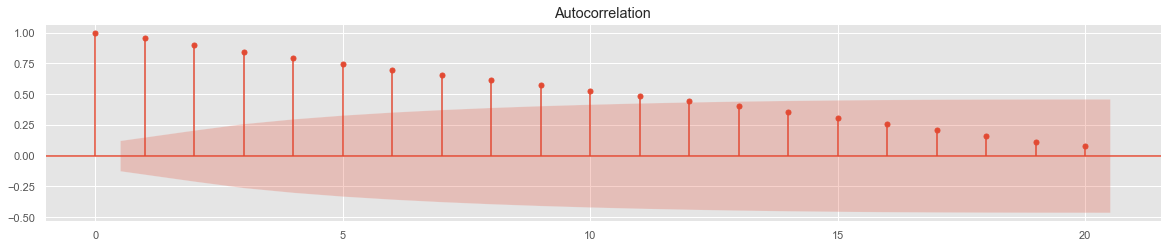

In [28]:
timeSeries = df_2021_Amazon.loc[:, ["Date","High"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

#### ADF 검정
H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.   
H1(대립가설) : 자료가 정상성을 만족한다.

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.988479
p-value: 0.035984
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


#### 1차 차분
p-value 0.05를 넘으면 정상성을 만족하지 못하기 때문에 1차 차분을 해줘야 함  
일정한 패턴이 보이지 않는다면 정상성 충족

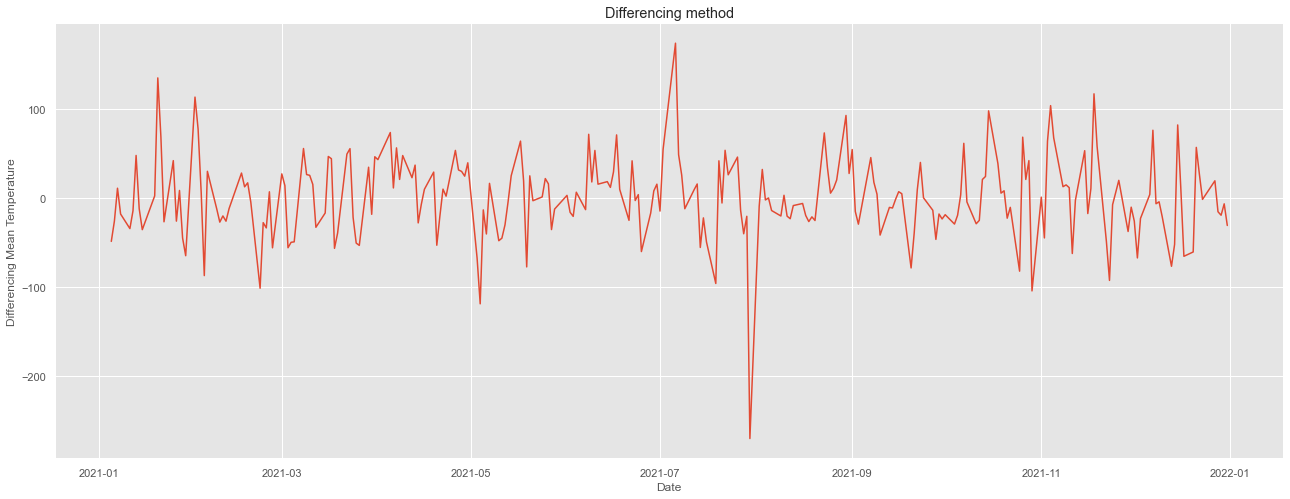

In [30]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [31]:
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.988479
p-value: 0.035984
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


#### ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

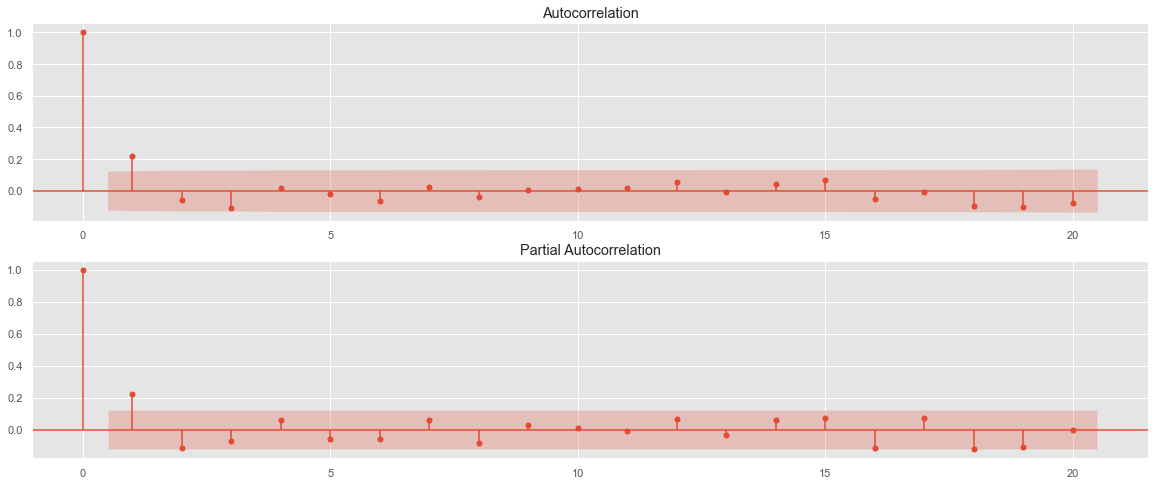

In [32]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1) #  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)# , lags=40

#### 0에 수렴한 212 모형을 base model로 시도

c:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



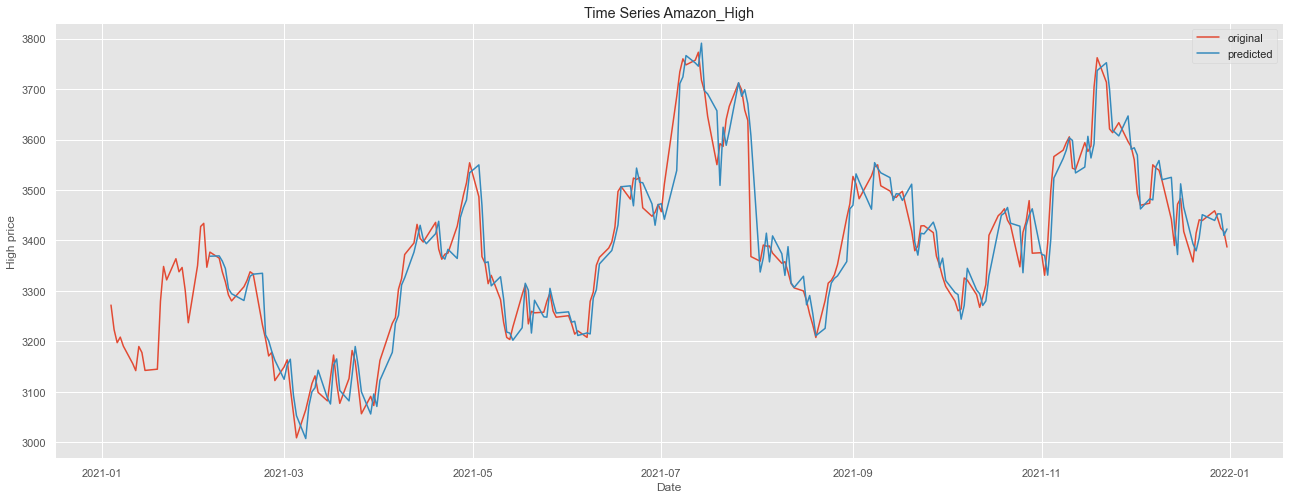

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

# predict
start_index = datetime(2021, 2, 5)
end_index = datetime(2021, 12, 31)
Amazon_High = model_fit.predict(start=start_index, end=end_index, typ='linear') # 차분했으면 typ을 levels로 설정해줘야 함

# visualization
plt.figure(figsize=(22,8))
plt.plot(df_2021_Amazon.Date,df_2021_Amazon.High,label = "original")
plt.plot(Amazon_High,label = "predicted")
plt.title("Time Series Amazon_High")
plt.xlabel("Date")
plt.ylabel("High price")
plt.legend()
plt.show()

#### 잔차 분석을 통해 모델에 문제가 없는지 확인

No handles with labels found to put in legend.


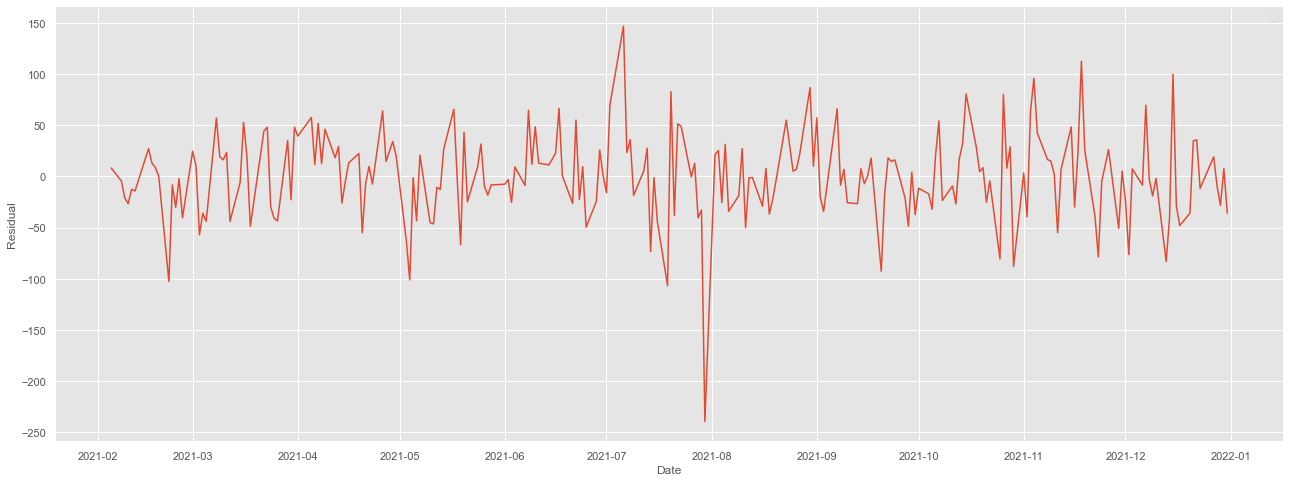

In [37]:
resi = np.array(df_2021_Amazon[df_2021_Amazon.Date>=start_index].High) - np.array(Amazon_High)

plt.figure(figsize=(22,8))
plt.plot(df_2021_Amazon.Date[df_2021_Amazon.Date>=start_index],resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

#### 성능 확인

In [38]:
from sklearn import metrics

# 성능 확인용 함수 정의
def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrics.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)

    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape
    },
                      index=[0])
    return df

scoring(np.array(df_2021_Amazon[df_2021_Amazon.Date >= start_index].High), np.array(Amazon_High))

,R2,Corr,RMSE,MAPE
0,93.044,0.965,42.883,0.936


### Auto Arima(자동 시계열 분석)
#### Auto Arima 과정
1. 시각화: 시계열 자료를 시각화해서 추세, 계절성, 주기가 있는지 파악합니다. 혹은 데이터를 변환해줄 필요가 있는지 파악합니다.
    1. 추세가 있다면 정상성을 만족하지 않기 때문에 몇 차 차분이 적당할지 단위근 검정을 해야 합니다. 이는 pmdarima.arima의 ndiffs 함수로 쉽게 구할 수 있습니다.
    2. 계절성이 있다면 비계절성 ARIMA 대신 계절성 ARIMA (SARIMA)를 따르므로, auto_arima 함수의 seasonal = True로 지정해주어야 합니다.
    3. 주기가 있다면 auto_arima 함수의 m의 인자에 넣어주어야 합니다. 이는 계절적 주기에 얼마나 많은 관측치가 있는지를 명시하는 파라미터이고, 데이터 분석가가 개입해서 넣어줘야 하는 값 (apriori)입니다. 예를 들어 m = 7이면 일별 (daily), m = 52이면 주별 (weekly)1년에 52주가 있기 때문에 52의 주기를 가집니다!, m = 12이면 월별 (monthly) 데이터입니다. 기본값은 m = 1로, 비계절성 데이터를 의미합니다.
    4. 데이터 변환은 과거와 현재, 미래 데이터를 봤을 때 분산의 차이가 크다면 로그 변환이나 Box-Cox 변환을 고려해볼 수 있습니다.
2. 모형 적합: auto_arima를 통해 적당한 p,d,q를 추정하고, 계수들을 추정합니다.
3. 잔차 검정: 잔차가 백색잡음 과정인지 (=정상성을 만족하는지), 정규성 및 등분산성을 만족하는지 파악합니다.
summary 결과에서 Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB) 검정 만족 여부를 파악하실 수 있습니다.
plot_diagnostics 잔차 그래프로도 정상성과 정규성을 만족하는지 파악하실 수 있습니다.
4. 모형 refresh 및 예측: 모형이 잘 적합되었으면 모형을 refresh하면서 미래 관측치를 예측합니다. NEW!! 지난 번 설명에서 업데이트되는 부분! 주의할 점은 한번에 테스트 데이터를 예측하는 것이 아니라, 하나씩 예측하고 관측치를 업데이트해주는 과정이 필요하다는 점입니다. 이 부분이 바로 “모형을 refresh”하는 과정입니다.
5. 모형 평가: MAPE로 잔차가 실제 값에서 얼마나 벗어나 있는지 파악합니다.

#### 인자 의미
y: array 형태의 시계열 자료  
d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음  
start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)  
start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)  
m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 $m=4$이면 분기별, $m=12$면 월별, $m=1$이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.   
seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부  
stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.  
trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.  

In [51]:
import pmdarima as pm

# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52, 
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌.
# Apple 주식의 종가로 시계열 분석
auto_arima_model = pm.auto_arima(df_apple['Close'], seasonal=False, m=1, stepwise = True
                      , trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2653.524, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2654.068, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2654.095, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2654.288, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2655.811, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.191 seconds


최적의 모델은 (0,1,0)로 나옴

In [52]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  568
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1324.762
Date:                Mon, 23 May 2022   AIC                           2653.524
Time:                        10:58:19   BIC                           2662.204
Sample:                             0   HQIC                          2656.911
                                - 568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1750      0.105      1.665      0.096      -0.031       0.381
sigma2         6.2652      0.274     22.864      0.000       5.728       6.802
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):                67.35
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.01
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1. Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB)에 대한 부분은 모두 잔차에 대한 검정 통계량  
2. Prob (Q) 값을 보면 0.23이므로 유의수준 0.05에서 귀무가설을 기각하지 못함  
3. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다” = 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음  
4. Jarque-Bera (JB)은 잔차가 정규성을 띠는지 검정한 통계량  
5. Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각 = 잔차가 정규성을 만족한다
6. 비대칭도(Skew)가 0에 가깝고 첨도(Kurtosis)가 3에 가까우면 정규 분포

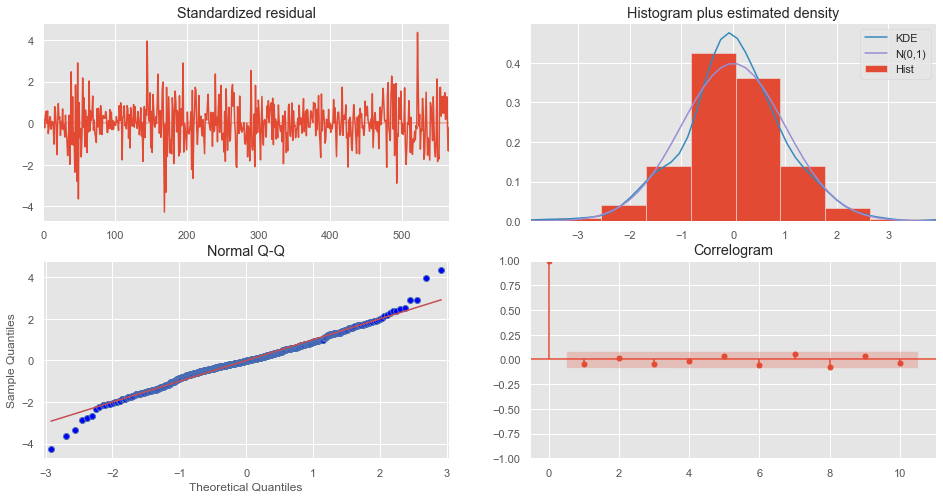

In [53]:
auto_arima_model.plot_diagnostics(figsize=(16, 8))
plt.show()

1. Standardized residual은 잔차를 그냥 시계열로 그린 것. 백색 잡음 답게 잔차의 시계열이 평균 0을 중심으로 무작위하게 움직이는 것을 볼 수 있음
2. Correlogram은 잔차에 대한 ACF. ACF도 어느 정도 허용 범위 안에 위치하여 자기상관이 없음을 알 수 있습니다.
3. Normal Q-Q그래프는 Q-Q 플랏으로 정규성을 만족한다면 빨간 일직선 위에 점들이 분포해야 함. 

In [58]:
# 데이터 분리
y_train = df_apple['Close'][:int(0.7*len(df_apple))]
y_test = df_apple['Close'][int(0.7*len(df_apple)):]

In [61]:
# 함수 정의
def stock_one_step():
    fc, conf_int = auto_arima_model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )
    
# 모델 업데이트
stock = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = stock_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    auto_arima_model.update(new_ob)

In [67]:
fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

#### 성능 평가

In [68]:
def MAPE(y_test, y_pred):
    	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")
# MAPE 1이 100%이므로 잘못 된거임

MAPE: 1.333
